In [2]:
a = 32*32*3
print(a)

3072


In [3]:
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow.keras import datasets,layers,models

In [4]:
(X_train , y_train ) , (X_test ,y_test) = datasets.cifar10.load_data()

In [7]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [8]:
y_train[:9]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)


In [11]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

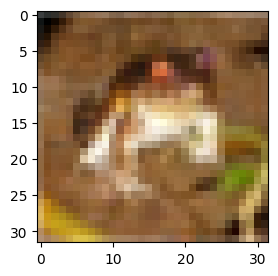

In [13]:
plt.figure(figsize=(12,3))
plt.imshow(X_train[0])

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [18]:
def plot_sample(X,y,index):
    plt.figure(figsize=(12,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

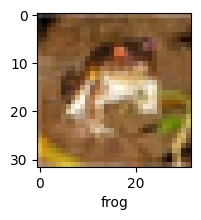

In [19]:
plot_sample(X_train,y_train,0)

In [20]:
# NORMALIZE

In [21]:
X_train = X_train/255

In [22]:
X_test = X_test/255

In [23]:
# Build ANN

In [25]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')

])

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
ann.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])



In [31]:
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 27ms/step - accuracy: 0.3009 - loss: 1.9392
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.4165 - loss: 1.6484
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.4522 - loss: 1.5526
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.4753 - loss: 1.4899
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.4984 - loss: 1.4329


In [32]:
# MODEL Accuracy 49

# MODEL CNN

In [34]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [36]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.3432 - loss: 1.7812
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5525 - loss: 1.2540
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6120 - loss: 1.1124
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6369 - loss: 1.0409
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6566 - loss: 0.9745
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6788 - loss: 0.9251
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6903 - loss: 0.8953
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7002 - loss: 0.8590
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7057 - loss: 0.8408
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7209 - loss: 0.8000


In [37]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6886 - loss: 0.9148


[0.9341069459915161, 0.6833000183105469]

In [38]:
y_pred = cnn.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [39]:
y_pred[:1]

array([[1.4673347e-03, 6.7975702e-06, 2.7332157e-03, 7.6296908e-01,
        2.2476139e-04, 1.8265793e-01, 5.7032239e-03, 8.6827706e-05,
        3.6275912e-02, 7.8749359e-03]], dtype=float32)

In [43]:
y_arg =[ np.argmax(element) for element in y_pred]

In [44]:
y_arg[:1]

[3]

In [45]:
y_test[1]

8

In [46]:
y_arg[1]

8